<a href="https://colab.research.google.com/github/Niharika-0611/assignment/blob/main/Copy_of_week13_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/bank_transactions_data_2.csv'
data = pd.read_csv(file_path)

# number of rows and columns
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")


Number of rows: 2512
Number of columns: 16


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [ ]:
# Count of unique values in each column
unique_counts = data.nunique()

print("\nUnique values per column")
print(unique_counts)

# Find the column with the most unique values
most_unique = unique_counts.sort_values(ascending=False)
print(f"\nColumn with the most unique values: {most_unique.index[0]} ({most_unique.iloc[0]} unique values)")

# Exclude a unique identifier column, if applicable
if most_unique.iloc[0] == data.shape[0]:
    print(f"Next column with the most unique values: {most_unique.index[1]} ({most_unique.iloc[1]} unique values)")



Unique values per column
TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64

Column with the most unique values: TransactionID (2512 unique values)
Next column with the most unique values: TransactionDate (2512 unique values)


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [ ]:
# Check for columns where all rows have the same values
constant_columns = [col for col in data.columns if data[col].nunique() == 1]

if constant_columns:
    print(f"\nColumns with the same value in every row: {constant_columns}")
else:
    print("\nNo columns with the same value in every row found")



No columns with the same value in every row found


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

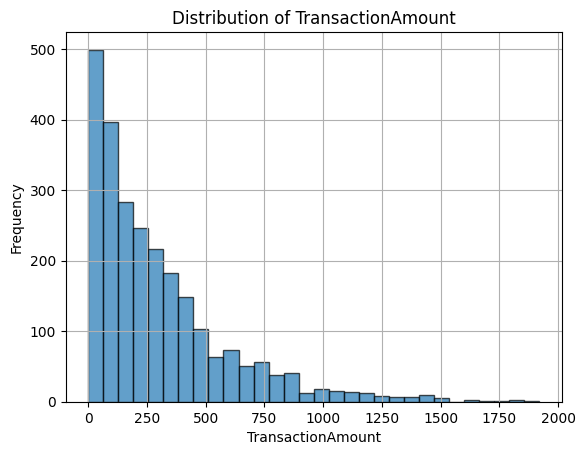

In [ ]:
import matplotlib.pyplot as plt

TransactionAmount = data.select_dtypes(include=['float64', 'int64']).columns[0]  # Use the first numeric column

# Plot a histogram to visualize the distribution of transaction amount
plt.hist(data[TransactionAmount].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title(f"Distribution of TransactionAmount")
plt.xlabel(TransactionAmount)
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

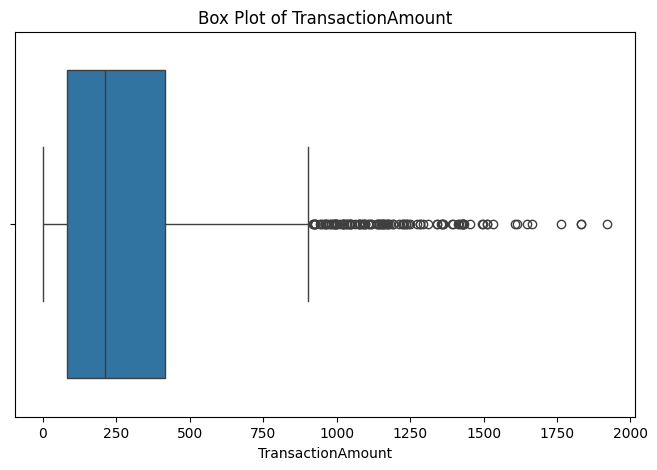


Outliers for TransactionAmount are below -417.08 or above 913.49.
Number of outliers: 113


In [ ]:
import seaborn as sns

if TransactionAmount:
    # Box plot to identify outliers visually
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[TransactionAmount])
    plt.title(f"Box Plot of {TransactionAmount}")
    plt.xlabel(TransactionAmount)
    plt.show()

    # Calculate Interquartile Range (IQR) to identify outlier thresholds
    Q1 = data[TransactionAmount].quantile(0.25)
    Q3 = data[TransactionAmount].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter and count outliers
    outliers = data[(data[TransactionAmount] < lower_bound) | (data[TransactionAmount] > upper_bound)]
    print(f"\nOutliers for {TransactionAmount} are below {lower_bound:.2f} or above {upper_bound:.2f}.")
    print(f"Number of outliers: {len(outliers)}")
else:
    print("No numeric column found for outlier detection")


The boxplot visualization looks at the TransactionAmount distribution and visually marks outliers as points outside whiskers which denote extreme values. The position of the box and whiskers show the dispersion and orientation of the data while the shapes of these display indicate possible skewness. S for the measurement of outliers, the Interquartile Range (IQR) is determined; values below a lower limit or above an upper limit are considered to be extreme. For instance, particular values – amounts under $20 and over $150 – are considered outliers of the transaction range. In addition to this, the analysis also gives the count of outliers to make an understanding of the variability or the anomalous data in the dataset. These results can be used to inform how to deal with outliers, to eradicate them, limit them, or include them within the investigation in order to gain a better understanding them.











---



## Submitting Your Work

Submit your work as usual.